In [26]:
import numpy as np
import numpy.linalg as alg
import numpy.random as rd
import matplotlib.pyplot as plt

# Séance du 28 Mars 2023

## Planche n°4 - Calcul matriciel

#### Soit $A_n$ une matrice telle que $\forall j \in \{1,...,n\}, a_{1,j} = a_{n,j} = a_{j,1} = 1$

### 1. Donner le rang de $A_n$

In [10]:
def A(n) :
    A = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            if i == 0 or i == n-1 or j == 0 :
                A[i,j] = 1
    return A

print(A(10))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Le rang de A999 est 2


Le rang de $A_n$ est 2.

### 2. Calculer les valeurs propres de $A_n$ quand $n \in \{2,...,6\}$

In [17]:
for n in range(2,7) :
    print(f"Avec n={n}, les valeurs propres sont {[lam for lam in alg.eigvals(A(n))]}")

Avec n=2, les valeurs propres sont [2.0, 0.0]
Avec n=3, les valeurs propres sont [2.4142135623730954, -0.41421356237309537, 4.372894568791883e-17]
Avec n=4, les valeurs propres sont [2.732050807568878, -0.7320508075688774, 1.4395271239290154e-16, 1.232595164407831e-32]
Avec n=5, les valeurs propres sont [2.9999999999999987, -1.0, -1.6463839365748975e-17, 4.811906115089025e-33, -7.893394026108602e-33]
Avec n=6, les valeurs propres sont [3.2360679774997907, -1.2360679774997891, -7.998977154694683e-18, 4.6872828623963634e-32, 0.0, 2.430977952349616e-33]


### 3. Calculer $tr(A_n^2)$

### 4. En déduire les valeurs propres de $A_n$

## Planche n°1 - Probabilités

### 1. Écrire une fonction simulant n tirages et renvoyant la liste $[S_0,...,S_n]$

In [28]:
def listOfTirages(n):
    urne = [2,1]
    L = [0]
    S = 0
    for i in range(1,n+1):
        bouleTirée = rd.randint(1,urne[0]+urne[1]+1)
        bouleRouge = True if bouleTirée >= urne[0] else False
        if bouleRouge :
            S += 1
            urne[0] += 1
        else :
            urne[1] += 1
        L.append(S)
    return L

### 2. Écrire une fonction renvoyant $E(S_n)$ pour $n$ allant de 0 à 20

$E(S_n) = \sum^{n}_{k=0} k.P(S_n = k)$

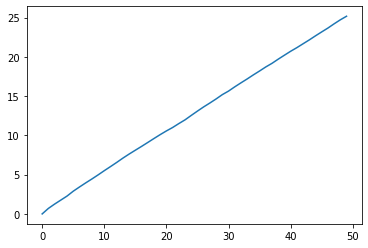

In [29]:
def esper(s=20, p=100):
    esperance = [0 for i in range(s)]
    esperanceTot = [0 for i in range(s)]
    for lmao in range(p) :
        S = listOfTirages(s)
        for i in range(s) :
            esperance[i] += S[i]
    for i in range(s) :
        esperanceTot[i] = esperance[i]/p
    return esperanceTot

plt.plot(range(50),esper(50,200))
plt.show()

### 3. Déterminer la loi conditionelle de $X_{n+1}$ sachant que $S_n = k$